In [2]:
pwd

'C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease'

In [3]:
x_train=train_datagen.flow_from_directory('C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\train',
                                          target_size=(128,128),class_mode='categorical',batch_size=32)
x_test=test_datagen.flow_from_directory('C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test',
                                          target_size=(128,128),class_mode='categorical',batch_size=32)

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [4]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [6]:
#model=Sequential()
#model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Flatten())
#model.add(Dense(40,kernel_initializer = 'uniform',activation ='relu'))
#model.add(Dense(20, kernel_initializer ='random_uniform',activation ='relu'))
#model.add(Dense(6, kernel_initializer ='random_uniform',activation ='softmax'))
#model.summary()

In [7]:
model = Sequential()
model.add(Convolution2D(32, (5, 5),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Convolution2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [9]:
len(x_train)

169

In [10]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=52,epochs=15)

C:\Users\91978\AppData\Local\Temp/ipykernel_19608/3138067069.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=52,epochs=15)


Epoch 1/15
169/169 [==============================] - 102s 594ms/step - loss: 0.7194 - accuracy: 0.7407 - val_loss: 0.2664 - val_accuracy: 0.8984
Epoch 2/15
169/169 [==============================] - 98s 580ms/step - loss: 0.3082 - accuracy: 0.8910 - val_loss: 0.1579 - val_accuracy: 0.9477
Epoch 3/15
169/169 [==============================] - 106s 629ms/step - loss: 0.3322 - accuracy: 0.8848 - val_loss: 0.3310 - val_accuracy: 0.8906
Epoch 4/15
169/169 [==============================] - 100s 587ms/step - loss: 0.2222 - accuracy: 0.9227 - val_loss: 0.1309 - val_accuracy: 0.9579
Epoch 5/15
169/169 [==============================] - 111s 657ms/step - loss: 0.1543 - accuracy: 0.9461 - val_loss: 0.1303 - val_accuracy: 0.9537
Epoch 6/15
169/169 [==============================] - 99s 585ms/step - loss: 0.1294 - accuracy: 0.9562 - val_loss: 0.1674 - val_accuracy: 0.9447
Epoch 7/15
169/169 [==============================] - 111s 656ms/step - loss: 0.1280 - accuracy: 0.9560 - val_loss: 0.1162 - v

In [22]:
model.save('fruit.h5') 

In [23]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('fruit.h5')

In [25]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Apple___Black_rot\\00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.jpg", target_size=(128,128))

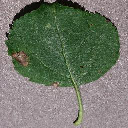

In [26]:
img

In [27]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Apple___Black_rot'

In [28]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Apple___healthy\\0a02e8cb-b715-497f-a16a-c28b3409f927___RS_HL 7432.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Apple___healthy'

In [29]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Corn_(maize)___healthy\\0ad1f85a-765f-43e5-8b7b-4a7521be768d___R.S_HL 5520 copy 2.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Corn_(maize)___healthy'

In [30]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Peach___Bacterial_spot\\0acacb6e-3517-4277-ab89-2cd9636d8b45___Rutg._Bact.S 1442.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Peach___Bacterial_spot'

In [31]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Corn_(maize)___Northern_Leaf_Blight\\0d0f6d14-be5c-4cb8-adb4-2cfd4d5f8540___RS_NLB 3642.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Corn_(maize)___Northern_Leaf_Blight'

In [32]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\fruit-dataset\\fruit-dataset\\test\\Peach___healthy\\4a87f671-1b68-49cb-bb69-7be29499caba___Rutg._HL 3716.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Peach___healthy'